In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
cwd = os.getcwd()
test_set = pd.DataFrame(pd.read_csv(os.path.join(cwd, 'datasets/test_data.csv')))
dataset = pd.DataFrame(pd.read_csv(os.path.join(cwd, 'datasets/train_data.csv')))

In [3]:
dataset.head()

,ID,parents,has_nurs,form,children,housing,finance,social,health,app_status
0,1,usual,less_proper,complete,3,critical,convenient,problematic,not_recom,0
1,2,pretentious,very_crit,completed,1,convenient,inconv,nonprob,not_recom,0
2,3,pretentious,proper,incomplete,1,less_conv,convenient,slightly_prob,priority,1
3,4,great_pret,improper,complete,1,convenient,convenient,nonprob,recommended,1
4,5,great_pret,less_proper,completed,1,convenient,convenient,slightly_prob,priority,1


In [4]:
dataset.shape

(10368, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10368 non-null  int64 
 1   parents     10368 non-null  object
 2   has_nurs    10368 non-null  object
 3   form        10368 non-null  object
 4   children    10368 non-null  object
 5   housing     10368 non-null  object
 6   finance     10368 non-null  object
 7   social      10368 non-null  object
 8   health      10368 non-null  object
 9   app_status  10368 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 810.1+ KB


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2592 non-null   int64 
 1   parents   2592 non-null   object
 2   has_nurs  2592 non-null   object
 3   form      2592 non-null   object
 4   children  2592 non-null   object
 5   housing   2592 non-null   object
 6   finance   2592 non-null   object
 7   social    2592 non-null   object
 8   health    2592 non-null   object
dtypes: int64(1), object(8)
memory usage: 182.4+ KB


In [7]:
dataset[dataset.isnull().any(axis=1)]    # any null records available?
del dataset['ID']
del test_set['ID']

### Label Encoding

In [8]:
label_encoder = preprocessing.LabelEncoder()

In [9]:
# Label Encoding for ordinal columns
def clean_ordinal(dataset):
    columns_ordinal = ['parents', 'has_nurs', 'children', 'housing', 'social', 'health', 'finance']

    for column in columns_ordinal:
        dataset[column] = label_encoder.fit_transform(dataset[column])
    return dataset

### One Hot Encoding

In [10]:
onehot_encoder = preprocessing.OneHotEncoder(drop='first')

In [11]:
# OneHotEncoding for nominal columns
def clean_nominal(dataset):
    columns_nominal = ['form']

    cleaned_dataset = dataset

    for column in columns_nominal:
        X = onehot_encoder.fit_transform(dataset[column].values.reshape(-1, 1)).toarray()
        # create dataframe from encoded data
        dataset_onehot = pd.DataFrame(X, columns = [column + '_' + str(i) for i in range(X.shape[1])]) 
        # update dataset -> cleaned_dataset
        cleaned_dataset = pd.concat([dataset_onehot, cleaned_dataset], axis=1)
        # remove encoded column from dataset
        del cleaned_dataset[column]
    return cleaned_dataset

In [12]:
# Test set cleaning
test_set = clean_ordinal(test_set)
cleaned_test_set = clean_nominal(test_set)
cleaned_test_set.head()

,form_0,form_1,form_2,parents,has_nurs,children,housing,finance,social,health
0,0.0,0.0,0.0,2,3,0,0,0,0,2
1,0.0,0.0,0.0,2,3,0,0,1,0,1
2,0.0,0.0,0.0,2,3,0,0,1,1,1
3,0.0,0.0,0.0,2,3,0,2,0,1,2
4,0.0,0.0,0.0,2,3,0,2,0,1,1


In [13]:
cleaned_dataset = clean_nominal(clean_ordinal(dataset))
cleaned_dataset.head()

,form_0,form_1,form_2,parents,has_nurs,children,housing,finance,social,health,app_status
0,0.0,0.0,0.0,2,2,2,1,0,1,0,0
1,1.0,0.0,0.0,1,4,0,0,1,0,0,0
2,0.0,0.0,1.0,1,3,0,2,0,2,1,1
3,0.0,0.0,0.0,0,1,0,0,0,0,2,1
4,1.0,0.0,0.0,0,2,0,0,0,2,1,1


### Independant dependant var splitting

In [14]:
x = cleaned_dataset.iloc[:, 0:-1]
y = cleaned_dataset.iloc[:, -1]

### Normalizing

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

x = scaler.fit_transform(x)

### Test train split

In [16]:
# splitting dataset to training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Classifier

In [17]:
x_train.shape

(7257, 10)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [19]:
activation = 'relu'
optimizer = 'adam'
init = 'uniform'

In [26]:
classifier = Sequential()

classifier.add(Dense(12, input_dim=10, activation='relu'))
classifier.add(Dense(12, input_dim=10, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
# Compile model
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# classifier.add(Dense(12,
#                      input_shape=(7, ),
#                      kernel_initializer='uniform',
#                      activation=activation                       
#                     )
#               )

In [27]:
classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = classifier.fit(x_train, y_train, batch_size=10, epochs=50, validation_split=0.1, verbose = 1, shuffle=True )

Epoch 1/50
654/654 [==============================] - 1s 821us/step - loss: 0.6105 - accuracy: 0.6748 - val_loss: 0.4537 - val_accuracy: 0.7658
Epoch 2/50
654/654 [==============================] - 0s 629us/step - loss: 0.4226 - accuracy: 0.7842 - val_loss: 0.4313 - val_accuracy: 0.7824
Epoch 3/50
654/654 [==============================] - 0s 623us/step - loss: 0.4004 - accuracy: 0.7955 - val_loss: 0.4208 - val_accuracy: 0.7851
Epoch 4/50
654/654 [==============================] - 0s 655us/step - loss: 0.3924 - accuracy: 0.7986 - val_loss: 0.4005 - val_accuracy: 0.7948
Epoch 5/50
654/654 [==============================] - 0s 627us/step - loss: 0.3595 - accuracy: 0.8208 - val_loss: 0.3350 - val_accuracy: 0.8333
Epoch 6/50
654/654 [==============================] - 0s 626us/step - loss: 0.2919 - accuracy: 0.8663 - val_loss: 0.2866 - val_accuracy: 0.8705
Epoch 7/50
654/654 [==============================] - 0s 621us/step - loss: 0.2458 - accuracy: 0.8929 - val_loss: 0.2397 - val_accuracy:

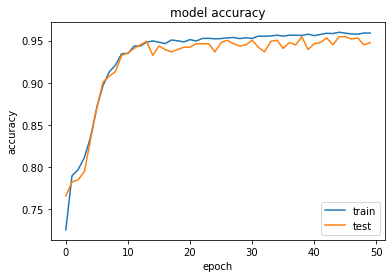

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

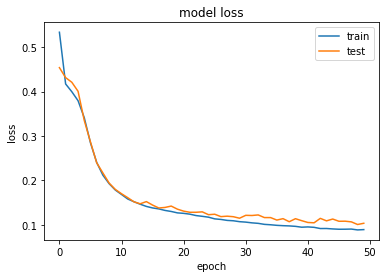

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
from sklearn import metrics
y_pred = (classifier.predict(x_test) > 0.5)

print('Accuracy', metrics.accuracy_score(y_test, y_pred))
# # for tanh, sigmoid, binarycrossentropy -> 96.88%
# loss, accuracy = classifier.evaluate(x_test,y_test)

Accuracy 0.9453551912568307


In [33]:
# epoch 50
# act = tanh -> init = uniform |optimizer = adam  -> Accuracy 0.9697846351655416 -> cm(30, 64) -> f1 = 97
# act = tanh -> init = uniform |optimizer = nadam  -> Accuracy 0.9588556734169077 -> cm(1, 127) -> f1 = 96
## epoch 50
# act = relu -> init =uniform | optimizer = adam -> Accuracy 0.973963355834137 -> cm(14, 67) -> f1 = 97 ***
# act = relu -> init =uniform | optimizer = nadam -> Accuracy 0.9713918354226937 -> cm(58, 31) -> f1 = 97 ***
# act = relu -> init =he_uniform | optimizer = adam -> Accuracy 0.9697846351655416 -> cm(39, 55) -> f1 = 97
###
# n = 15
# act = softsign -> init =uniform | optimizer = nadam ->Accuracy 0.9681774349083896 -> cm(42, 57) -> f1 = 97
# act = softsign -> init =he_uniform | optimizer = nadam ->Accuracy 0.9704275152684024 -> cm(47, 45) -> f1 = 97
# n = 22
# act = softsign -> init =he_uniform | optimizer = nadam ->Accuracy 0.9707489553198329 -> cm(28, 63) -> f1 = 97 
# same with epoch 100, batch 40


### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

predict_class = classifier.predict(x_test)
predict_class = (y_pred > 0.5)
predict_class

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1932,  108],
       [  62, 1009]], dtype=int64)

### Classification report

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2005
           1       1.00      1.00      1.00      1106

    accuracy                           1.00      3111
   macro avg       1.00      1.00      1.00      3111
weighted avg       1.00      1.00      1.00      3111



### ROC-AUC

In [653]:
y_pred_proba = classifier.predict_proba(x_test)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

C:\Users\ACER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


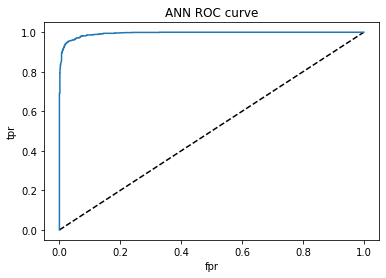

In [654]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ANN ROC curve')
plt.show()

In [655]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9942274439377794

### New prediction

In [472]:
cleaned_test_set = scaler.fit_transform(cleaned_test_set)

In [473]:
cleaned_test_set.shape

(2592, 7)

In [656]:
predict = classifier.predict(cleaned_test_set)

arr = np.argmax(predict, axis=1)
arr = np.array(arr.tolist())
np.savetxt("predicted/pred_ann_godmn.csv", np.dstack((np.arange(1, arr.size+1),arr))[0],"%d,%d",header="ID,app_status")

# Hyper parameter tuning

In [37]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam

##### Optimizer

In [377]:
def create_model(optimizer='adam'):
    classifier = Sequential()
    
    classifier.add(Dense(22, input_dim=7, activation='softsign', kernel_initializer='he_uniform'))
    classifier.add(Dense(22, input_dim=7, activation='softsign', kernel_initializer='he_uniform'))
    classifier.add(Dense(1, activation='sigmoid'))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return classifier

In [378]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [379]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [380]:
param_grid = dict(optimizer=optimizer)
param_grid

{'optimizer': ['SGD',
  'RMSprop',
  'Adagrad',
  'Adadelta',
  'Adam',
  'Adamax',
  'Nadam']}

In [381]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [382]:
grid_result = grid.fit(x, y)

Best score for optimizer

In [383]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.970486 using {'optimizer': 'Adam'}


In [384]:
means = grid_result.cv_results_['mean_test_score']

In [385]:
stds = grid_result.cv_results_['std_test_score']

In [386]:
params = grid_result.cv_results_['params']

In [387]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.965181 (0.005047) with: {'optimizer': 'SGD'}
0.967207 (0.003225) with: {'optimizer': 'RMSprop'}
0.781539 (0.013020) with: {'optimizer': 'Adagrad'}
0.677180 (0.019230) with: {'optimizer': 'Adadelta'}
0.970486 (0.003974) with: {'optimizer': 'Adam'}
0.963156 (0.001573) with: {'optimizer': 'Adamax'}
0.969329 (0.003713) with: {'optimizer': 'Nadam'}


In [49]:
means

array([0.95351082, 0.96315589, 0.95669369, 0.9675926 , 0.96161266,
       0.96826774, 0.96836422])

In [50]:
results = []
for i in range(3):
    grid_result = grid.fit(x, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    results.append(means)
    print(i)
reaults = np.array(results)
np.mean(results, axis=0)

array([0.96076389, 0.95929784, 0.96165123, 0.95979939, 0.96157407,
       0.95677084, 0.96109182])

In [51]:
results = np.array(results)

In [52]:
np.mean(results, axis=0)

array([0.96076389, 0.95929784, 0.96165123, 0.95979939, 0.96157407,
       0.95677084, 0.96109182])

###### Batch size and Number of Epochs

In [407]:
def create_model():
    classifier = Sequential()
    
    classifier.add(Dense(22, input_dim=7, activation='softsign'))
    classifier.add(Dense(22, input_dim=7, activation='softsign'))
    classifier.add(Dense(1, activation='sigmoid'))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return classifier

In [408]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [409]:
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]

In [410]:
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [411]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [412]:
grid_result = grid.fit(x, y)

Best score for Batch Size and Epoch

In [413]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.969811 using {'batch_size': 40, 'epochs': 100}


In [414]:
means, stds, params = grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']

In [61]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.919560 (0.014417) with: {'batch_size': 10, 'epochs': 10}
0.964024 (0.003483) with: {'batch_size': 10, 'epochs': 50}
0.939815 (0.014371) with: {'batch_size': 10, 'epochs': 100}
0.895448 (0.019604) with: {'batch_size': 20, 'epochs': 10}
0.949074 (0.012764) with: {'batch_size': 20, 'epochs': 50}
0.959298 (0.013172) with: {'batch_size': 20, 'epochs': 100}
0.866609 (0.023776) with: {'batch_size': 40, 'epochs': 10}
0.936053 (0.001437) with: {'batch_size': 40, 'epochs': 50}
0.948110 (0.013577) with: {'batch_size': 40, 'epochs': 100}
0.872010 (0.010337) with: {'batch_size': 60, 'epochs': 10}
0.935667 (0.010174) with: {'batch_size': 60, 'epochs': 50}
0.954475 (0.012277) with: {'batch_size': 60, 'epochs': 100}
0.837963 (0.025869) with: {'batch_size': 80, 'epochs': 10}
0.930556 (0.012297) with: {'batch_size': 80, 'epochs': 50}
0.958044 (0.009424) with: {'batch_size': 80, 'epochs': 100}
0.852913 (0.010047) with: {'batch_size': 100, 'epochs': 10}
0.943383 (0.009096) with: {'batch_size': 100, 'epo

##### Weight Tuning

In [276]:
def create_model(init_mode='uniform'):
    classifier = Sequential()
    
    classifier.add(Dense(15, input_dim=7, activation='relu'))
    classifier.add(Dense(15, input_dim=7, activation='relu'))
    classifier.add(Dense(1, activation='sigmoid'))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return classifier

In [277]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [278]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

In [279]:
param_grid = dict(init_mode=init_mode)

In [280]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [281]:
grid_result = grid.fit(x, y)

Best Weights init

In [282]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.968364 using {'init_mode': 'he_uniform'}


In [283]:
means, stds, params = grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']

In [284]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.967785 (0.004662) with: {'init_mode': 'uniform'}
0.965567 (0.002500) with: {'init_mode': 'lecun_uniform'}
0.966917 (0.002848) with: {'init_mode': 'normal'}
0.958140 (0.009756) with: {'init_mode': 'zero'}
0.966146 (0.003690) with: {'init_mode': 'glorot_normal'}
0.964024 (0.001500) with: {'init_mode': 'glorot_uniform'}
0.968364 (0.005080) with: {'init_mode': 'he_normal'}
0.968364 (0.001384) with: {'init_mode': 'he_uniform'}


##### Activation function

In [75]:
def create_model(activation='relu'):
    classifier = Sequential()
    
    classifier.add(Dense(12, input_dim=7, activation=activation))
    classifier.add(Dense(12, input_dim=7, activation=activation))
    classifier.add(Dense(1, activation='sigmoid'))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return classifier

In [76]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [77]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

In [78]:
param_grid = dict(activation=activation)

In [79]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [80]:
grid_result = grid.fit(x, y)

 Best Activation Func

In [81]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.968846 using {'activation': 'softsign'}


In [82]:
means, stds, params = grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']

In [83]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.931038 (0.006323) with: {'activation': 'softmax'}
0.950231 (0.003071) with: {'activation': 'softplus'}
0.968846 (0.003738) with: {'activation': 'softsign'}
0.967496 (0.003377) with: {'activation': 'relu'}
0.967978 (0.004261) with: {'activation': 'tanh'}
0.934124 (0.007635) with: {'activation': 'sigmoid'}
0.926022 (0.003663) with: {'activation': 'hard_sigmoid'}
0.781925 (0.006750) with: {'activation': 'linear'}


##### Number of Neurons

In [361]:
def create_model(neurons=1):
    classifier = Sequential()
    
    classifier.add(Dense(neurons, input_dim=7, activation='softsign', kernel_initializer='he_uniform'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    
    return classifier

In [362]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [364]:
neurons = [i for i in range(10, 25)]

In [365]:
param_grid = dict(neurons=neurons)

In [366]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [367]:
grid_result = grid.fit(x, y)

Best Number of Neurons

In [369]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.970293 using {'neurons': 22}


In [370]:
means, stds, params = grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']

In [371]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.958719 (0.008062) with: {'neurons': 10}
0.957948 (0.002592) with: {'neurons': 11}
0.960552 (0.005769) with: {'neurons': 12}
0.964892 (0.004878) with: {'neurons': 13}
0.962963 (0.003637) with: {'neurons': 14}
0.965374 (0.005827) with: {'neurons': 15}
0.965664 (0.005337) with: {'neurons': 16}
0.965664 (0.005798) with: {'neurons': 17}
0.965664 (0.003259) with: {'neurons': 18}
0.966628 (0.004435) with: {'neurons': 19}
0.967207 (0.004162) with: {'neurons': 20}
0.968943 (0.002425) with: {'neurons': 21}
0.970293 (0.004294) with: {'neurons': 22}
0.967207 (0.001573) with: {'neurons': 23}
0.968750 (0.003690) with: {'neurons': 24}


##### Drop out

In [505]:
from keras.constraints import maxnorm
from keras.layers import Dropout

def create_model(dropout_rate=0.0, weight_constraint=0):
    classifier = Sequential()

    classifier.add(Dense(22, input_dim=7, activation='relu', kernel_initializer=init, kernel_constraint=maxnorm(weight_constraint)))
    classifier.add(Dropout(dropout_rate))
    classifier.add(Dense(22, input_dim=7, activation='relu', kernel_initializer=init, kernel_constraint=maxnorm(weight_constraint)))
    classifier.add(Dropout(dropout_rate))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer=init))
    # Compile model
    classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return classifier

In [506]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [507]:
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [508]:
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)

In [509]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [510]:
grid_result = grid.fit(x, y)

In [511]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.967400 using {'dropout_rate': 0.0, 'weight_constraint': 2}


In [512]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [513]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.961709 (0.011594) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.967400 (0.005091) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.946084 (0.017014) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.943480 (0.015475) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.940972 (0.019072) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.937789 (0.005526) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.932967 (0.003678) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.946470 (0.008074) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.945602 (0.003098) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.951871 (0.005856) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.947338 (0.009764) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.948785 (0.002662) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.949846 (0.014489) with: {'dropout_rate': 0.2, 'weight_constraint': 3}
0.946952 (0.008137) with: {'dropout_rate': 0.2, 'weight_constrai